# Geochronology from the Franklin LIP and Cryogenian glacial successions

## Import scientific python libraries and custom functions

The `geochron_functions.py` script in this repository defines custom functions for analysis and plotting. The other imported 

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from geochron_functions import *


In [2]:
South_China_color = '#F1C40F'
Ethiopia_color = '#E67E22'
Laurentia_pre_glacial_color = '#A04000'
Laurentia_syn_glacial_color = '#01486e'
Oman_syn_glacial_color = '#287fad'
Franklin_color = 'red'

## Individual zircon dates

### Ethiopia - MacLennan et al. 2018

In [3]:
SAM_ET_03 = pd.read_csv('../data/geochron/Ethiopia/SAM-ET-03.csv')
SAM_ET_03 = SAM_ET_03[SAM_ET_03['include'] == 'yes']
SAM_ET_04 = pd.read_csv('../data/geochron/Ethiopia/SAM-ET-04.csv')
SAM_ET_04 = SAM_ET_04[SAM_ET_04['include'] == 'yes']
T46_102_2Z = pd.read_csv('../data/geochron/Ethiopia/T46-102_2Z.csv')
T46_102_2Z = T46_102_2Z[T46_102_2Z['include'] == 'yes']

# sort
SAM_ET_03.sort_values(by=['206Pb/238U'],
                      ascending=[True], inplace=True)
SAM_ET_04.sort_values(by=['206Pb/238U'],
                      ascending=[True], inplace=True)
T46_102_2Z.sort_values(by=['206Pb/238U'],
                       ascending=[True], inplace=True)
SAM_ET_03.reset_index(inplace=True, drop=True)
SAM_ET_04.reset_index(inplace=True, drop=True)
T46_102_2Z.reset_index(inplace=True, drop=True)

#make dictionaries of weighted means
SAM_ET_03_mean = dict(mean=719.58,
                      two_sigma=0.56,
                      color=Ethiopia_color,
                      label='SAM-ET-03 (Ethiopia)')
SAM_ET_04_mean = dict(mean=719.68,
                      two_sigma=0.46,
                      color=Ethiopia_color,
                      label='SAM-ET-04 (Ethiopia)')
T46_102_2Z_mean = dict(mean=735.25,
                      two_sigma=0.25,
                      color=Ethiopia_color,
                      label='T46_102_2Z (Ethiopia)')

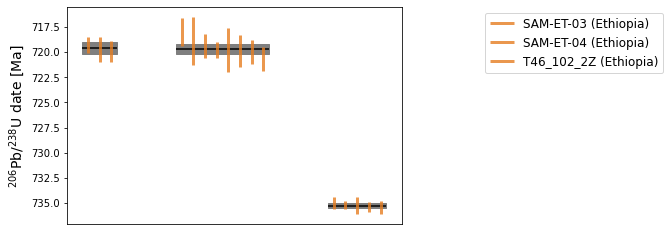

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:ylabel='$^{206}$Pb/$^{238}$U date [Ma]'>)

In [4]:
make_dates_plot([SAM_ET_03,SAM_ET_04,T46_102_2Z],
                [SAM_ET_03_mean,SAM_ET_04_mean,T46_102_2Z_mean])



## Ethiopia Monte Carlo Results

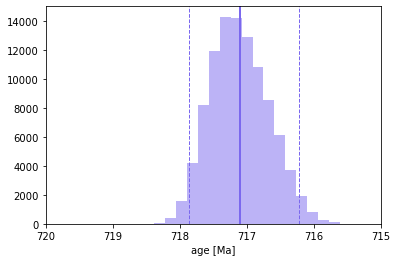

In [5]:
MC_results = np.loadtxt('../data/Geochron/Ethiopia/MC_results_mapped.csv')

MC_mean = np.mean(MC_results)
MC_2_5 = stats.scoreatpercentile(MC_results, 2.5)
MC_97_5 = stats.scoreatpercentile(MC_results, 97.5)

fig, ax = plt.subplots()

ax.hist(MC_results, bins=20, histtype='stepfilled', color='mediumslateblue', alpha=0.5)
ax.axvline(MC_mean, color='mediumslateblue', lw=2)
ax.axvline(MC_2_5, color='mediumslateblue', lw=1, ls='--')
ax.axvline(MC_97_5, color='mediumslateblue', lw=1, ls='--')
ax.set_xlabel('age [Ma]')
ax.set_xlim(720,715)

plt.show(fig)

### Laurentia - Cox et al. (2015)

In [6]:
Cox2015 = pd.read_csv('../data/geochron/Laurentia/Cox2015_data.csv')

Cox2015.sort_values('206Pb/238U', inplace=True)
Cox2015 = Cox2015[Cox2015['include'] == 'yes']
Cox2015.reset_index(inplace=True, drop=True)


In [7]:
F624B_mean_date, F624B_2sigma = weighted_mean_from_df(Cox2015)

Cox2015_mean = dict(mean=F624B_mean_date,
                    two_sigma=F624B_2sigma,
                    color=Laurentia_pre_glacial_color,
                    label='F624B (Laurentia)')

The weighted mean is:
719.4679849208527
With a 2sigma error of:
0.286111189309946
N=
6


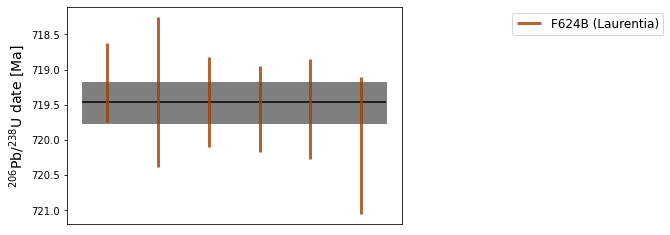

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:ylabel='$^{206}$Pb/$^{238}$U date [Ma]'>)

In [8]:
make_dates_plot([Cox2015],
                [Cox2015_mean])

## Laurentia - Macdonald et al. (2010)

In [9]:
Macdonald2010 = pd.read_csv(
    '../data/geochron/Laurentia/Macdonald2010_data.csv')
Macdonald2010 = Macdonald2010[Macdonald2010['include'] == 'yes']

F837B = Macdonald2010[Macdonald2010['sample'] == 'F837B'].copy()
F840A = Macdonald2010[Macdonald2010['sample'] == 'F840A'].copy()
F837B.sort_values('206Pb/238U', inplace=True)
F840A.sort_values('206Pb/238U', inplace=True)
F837B.reset_index(inplace=True, drop=True)
F840A.reset_index(inplace=True, drop=True)

In [10]:
F837B_mean_date, F837B_2sigma = weighted_mean_from_df(F837B)

F837B_mean = dict(mean=F837B_mean_date,
                    two_sigma=F837B_2sigma,
                    color=Laurentia_pre_glacial_color,
                    label='F837B (Laurentia)')

The weighted mean is:
717.4260864753657
With a 2sigma error of:
0.1377575222401132
N=
7


In [11]:
F840A_mean_date, F840A_2sigma = weighted_mean_from_df(F840A)

F840A_mean = dict(mean=F840A_mean_date,
                    two_sigma=F840A_2sigma,
                    color=Laurentia_syn_glacial_color,
                    label='F840A (Laurentia)')

The weighted mean is:
716.4705578001001
With a 2sigma error of:
0.23572205808333152
N=
6


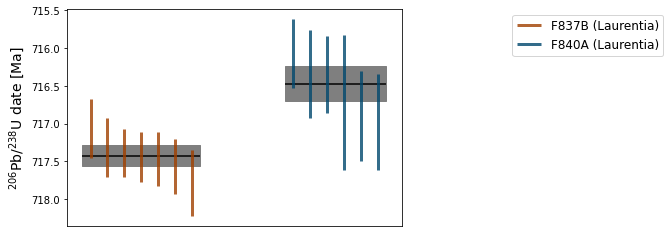

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:ylabel='$^{206}$Pb/$^{238}$U date [Ma]'>)

In [12]:
make_dates_plot([F837B,F840A],
                [F837B_mean,F840A_mean])


## Laurentia - Macdonald et al. (2017)

In [13]:
Macdonald2017 = pd.read_csv('../data/Geochron/Laurentia//Macdonald2017_data.csv')
Macdonald2017 = Macdonald2017[Macdonald2017['include'] == 'yes']

F917_1 = Macdonald2017[Macdonald2017['sample']=='F917-1'].copy()
F837C = Macdonald2017[Macdonald2017['sample']=='F837C'].copy()
F837A = Macdonald2017[Macdonald2017['sample']=='F837A'].copy()
_15PM06 = Macdonald2017[Macdonald2017['sample']=='15PM06'].copy()
_15PM08 = Macdonald2017[Macdonald2017['sample']=='15PM08'].copy()

F917_1.sort_values('206Pb/238U', inplace=True)
F837C.sort_values('206Pb/238U', inplace=True)
F837A.sort_values('206Pb/238U', inplace=True)
_15PM06.sort_values('206Pb/238U', inplace=True)
_15PM08.sort_values('206Pb/238U', inplace=True)

F917_1.reset_index(inplace=True, drop=True)
F837C.reset_index(inplace=True, drop=True)
F837A.reset_index(inplace=True, drop=True)
_15PM06.reset_index(inplace=True, drop=True)
_15PM08.reset_index(inplace=True, drop=True)

In [14]:
F917_1_mean_date, F917_1_2sigma = weighted_mean_from_df(F917_1)

F917_1_mean = dict(mean=F917_1_mean_date,
                    two_sigma=F917_1_2sigma,
                    color=Laurentia_syn_glacial_color,
                    label='F917_1 (Laurentia)')

The weighted mean is:
716.9351361641161
With a 2sigma error of:
0.23874107078365667
N=
6


In [15]:
F837C_mean_date, F837C_2sigma = weighted_mean_from_df(F837C)

F837C_mean = dict(mean=F837C_mean_date,
                    two_sigma=F837C_2sigma,
                    color=Laurentia_pre_glacial_color,
                    label='F837C (Laurentia)')

The weighted mean is:
717.6719300132769
With a 2sigma error of:
0.3156109092585548
N=
3


In [16]:
F837A_mean_date, F837A_2sigma = weighted_mean_from_df(F837A)

F837A_mean = dict(mean=F837A_mean_date,
                    two_sigma=F837A_2sigma,
                    color=Laurentia_pre_glacial_color,
                    label='F837A (Laurentia)')

The weighted mean is:
717.84505161271
With a 2sigma error of:
0.24095227652052018
N=
4


In [17]:
_15PM06_mean_date, _15PM06_2sigma = weighted_mean_from_df(_15PM06)

_15PM06_mean = dict(mean=_15PM06_mean_date,
                    two_sigma=_15PM06_2sigma,
                    color=Laurentia_pre_glacial_color,
                    label='15PM06 (Laurentia)')

The weighted mean is:
718.133175569848
With a 2sigma error of:
0.2780523694826306
N=
4


In [18]:
_15PM08_mean_date, _15PM08_2sigma = weighted_mean_from_df(_15PM08)

_15PM08_mean = dict(mean=_15PM08_mean_date,
                    two_sigma=_15PM08_2sigma,
                    color=Laurentia_pre_glacial_color,
                    label='15PM08 (Laurentia)')

The weighted mean is:
718.1180993803516
With a 2sigma error of:
0.2102624613831286
N=
6


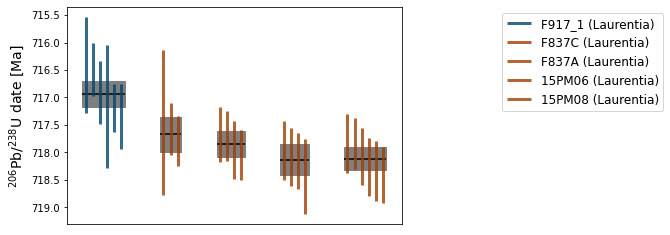

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:ylabel='$^{206}$Pb/$^{238}$U date [Ma]'>)

In [19]:


make_dates_plot([F917_1,F837C,F837A,_15PM06,_15PM08],
                [F917_1_mean,F837C_mean,F837A_mean,_15PM06_mean,_15PM08_mean])

## South China - Lan et al. 2020

**The data file needs to be updated to the TIMS data -- currently the SHRIMP**

In [20]:
Lan2020 = pd.read_csv('../data/Geochron/South_China/Lan2020_data.csv')

Lan2020.sort_values('206Pb/238U', inplace=True)
Lan2020 = Lan2020[Lan2020['include'] == 'yes']
Lan2020.reset_index(inplace=True, drop=True)

In [21]:
_2017SC01_mean_date, _2017SC01_2sigma = weighted_mean_from_df(Lan2020)

Lan2020_mean = dict(mean=_2017SC01_mean_date,
                    two_sigma=_2017SC01_2sigma,
                    color=South_China_color,
                    label='2017SC01 (South China)')

The weighted mean is:
720.0215527975806
With a 2sigma error of:
1.0120776920632637
N=
3


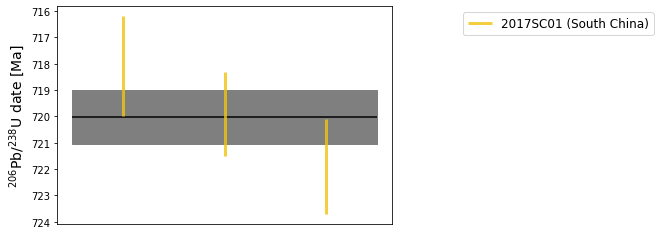

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:ylabel='$^{206}$Pb/$^{238}$U date [Ma]'>)

In [22]:
make_dates_plot([Lan2020],
                [Lan2020_mean])

## Oman - Bowring et al. (2007)

In [23]:
Bowring2007 = pd.read_csv('../data/Geochron/Oman/Bowring2007_data.csv')
Bowring2007 = Bowring2007[Bowring2007['include'] == 'yes']
Bowring2007['206Pb/238U_2sigma'] = Bowring2007['206Pb/238U'] * (Bowring2007['206Pb/238U_2sigma_perc']/100)
Bowring2007.sort_values('206Pb/238U', inplace=True)
Bowring2007.reset_index(inplace=True, drop=True)

zircon_means = [Bowring2007['206Pb/238U']]
zircon_2sigmas = [Bowring2007['206Pb/238U_2sigma']]
include = [Bowring2007['include']]

In [24]:
WM_54_mean_date, WM_54_2sigma = weighted_mean_from_df(Bowring2007)

Bowring2007_mean = dict(mean=WM_54_mean_date,
                    two_sigma=WM_54_2sigma,
                    color=Oman_syn_glacial_color,
                    label='WM_54 (Oman)')

The weighted mean is:
711.5211873202246
With a 2sigma error of:
0.21997098440898957
N=
5


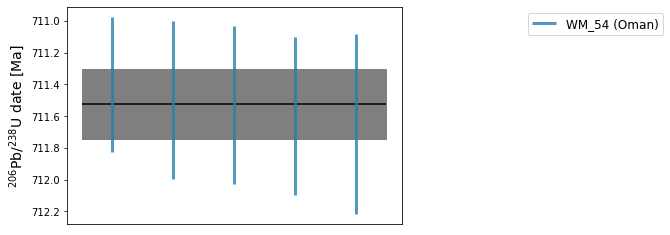

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:ylabel='$^{206}$Pb/$^{238}$U date [Ma]'>)

In [25]:
make_dates_plot([Bowring2007],
                [Bowring2007_mean])

[]

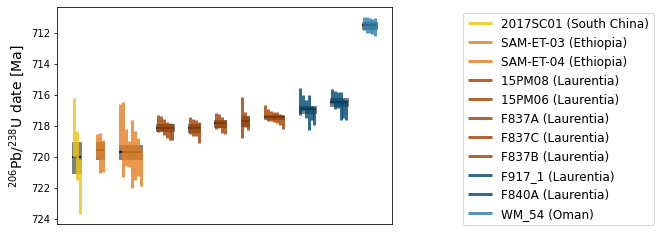

In [26]:
all_dates_dfs = [Lan2020,
                 SAM_ET_03,
                 SAM_ET_04,
                 _15PM08,
                 _15PM06,
                 F837A,
                 F837C,
                 F837B,
                 F917_1,
                 F840A,
                 Bowring2007]

all_dates_dicts = [Lan2020_mean,
                   SAM_ET_03_mean,
                   SAM_ET_04_mean,
                   _15PM08_mean,
                   _15PM06_mean,
                  F837A_mean,
                  F837C_mean,
                  F837B_mean,
                  F917_1_mean,
                  F840A_mean,
                  Bowring2007_mean]

sturt_zircon_means, sturt_zircon_2sigmas, \
sturt_include = extract_df_lists(all_dates_dfs)
sturt_sample_means, sturt_sample_2sigmas, sturt_colors, \
sturt_labels = extract_dict_lists(all_dates_dicts)

fig, ax = plot_dates(sturt_zircon_means, sturt_zircon_2sigmas, sturt_include,
                    sturt_sample_means, sturt_sample_2sigmas, sturt_colors, sturt_labels)
plt.gca().set_xticks([])

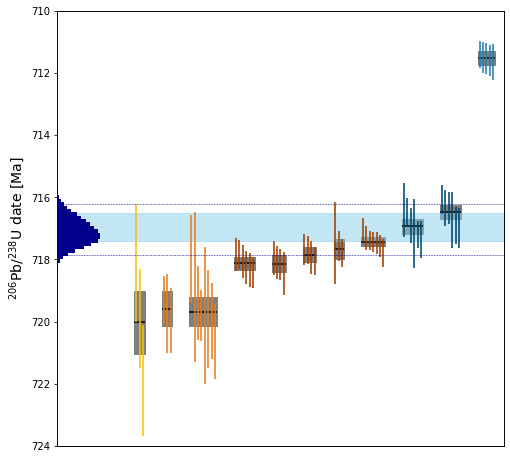

In [27]:
xlim = (-20,110)
ylim = (724,710)

# zircons
fig, ax = plot_dates(sturt_zircon_means, sturt_zircon_2sigmas, sturt_include,\
                     sturt_sample_means, sturt_sample_2sigmas, sturt_colors, sturt_labels,\
                     figsize=(8,8), lineweight=2.0, bbox_to_anchor=(1.45,1),legend=False)
ax.set_xlim(xlim)
ax.set_xticks([])

# sturtian start
rectangle = matplotlib.patches.Rectangle((xlim[0], 716.5),\
                                         (xlim[1]-xlim[0]), 717.4-716.5, color='skyblue', alpha=0.5)
ax.add_patch(rectangle)

# MC results
twinax = ax.twiny()
twinax.hist(MC_results, bins=30, histtype='stepfilled', orientation='horizontal', color='darkblue')
ax.axhline(MC_2_5, color='darkblue', lw=0.5, ls='--')
ax.axhline(MC_97_5, color='darkblue', lw=0.5, ls='--')
twinax.set_xlim(0,100000)
twinax.set_xticks([])
twinax.set_ylim(ylim)

plt.show(fig)

# Pu et al. (2022) Franklin dates

In [28]:
Pu2022 = pd.read_csv('../data/Geochron/Laurentia/Pu2022_zircon_dates.csv')
Pu2022 = Pu2022[Pu2022['include'] == 'yes']

_93JP_71JB = Pu2022[Pu2022['sample']=='93JP-71JB'].copy()
_93JP_71JB.sort_values('206Pb/238U', inplace=True)
_93JP_71JB.reset_index(inplace=True, drop=True)

_93JP_93K = Pu2022[Pu2022['sample']=='93JP-93K'].copy()
_93JP_93K.sort_values('206Pb/238U', inplace=True)
_93JP_93K.reset_index(inplace=True, drop=True)

_93JP_93L = Pu2022[Pu2022['sample']=='93JP-93L'].copy()
_93JP_93L.sort_values('206Pb/238U', inplace=True)
_93JP_93L.reset_index(inplace=True, drop=True)

_17RAT_R35B1 = Pu2022[Pu2022['sample']=='17RAT-R35B1'].copy()
_17RAT_R35B1.sort_values('206Pb/238U', inplace=True)
_17RAT_R35B1.reset_index(inplace=True, drop=True)

_14RAT_513A = Pu2022[Pu2022['sample']=='14RAT-513A'].copy()
_14RAT_513A.sort_values('206Pb/238U', inplace=True)
_14RAT_513A.reset_index(inplace=True, drop=True)

F1966 = Pu2022[Pu2022['sample']=='F1966'].copy()
F1966.sort_values('206Pb/238U', inplace=True)
F1966.reset_index(inplace=True, drop=True)


In [29]:
_17RAT_R35B1_mean_date, _17RAT_R35B1_2sigma = weighted_mean_from_df(_17RAT_R35B1)

_17RAT_R35B1_mean = dict(mean=_17RAT_R35B1_mean_date,
                    two_sigma=_17RAT_R35B1_2sigma,
                    color=Franklin_color,
                    label='17RAT_R35B1 (Franklin)')

The weighted mean is:
719.8609107244281
With a 2sigma error of:
0.21466412285934702
N=
6


In [30]:
F1966_mean_date, F1966_2sigma = weighted_mean_from_df(F1966)

F1966_mean = dict(mean=F1966_mean_date,
                    two_sigma=F1966_2sigma,
                    color=Franklin_color,
                    label='F1966 (Franklin)')

The weighted mean is:
719.0851119391116
With a 2sigma error of:
0.21625459379631037
N=
6


In [31]:
_93JP_71JB_mean_date, _93JP_71JB_2sigma = weighted_mean_from_df(_93JP_71JB)

_93JP_71JB_mean = dict(mean=_93JP_71JB_mean_date,
                    two_sigma=_93JP_71JB_2sigma,
                    color=Franklin_color,
                    label='93JP_71JB (Franklin)')

The weighted mean is:
719.0359496913438
With a 2sigma error of:
0.187227647909022
N=
9


In [32]:
_93JP_93L_mean_date, _93JP_93L_2sigma = weighted_mean_from_df(_93JP_93L)

_93JP_93L_mean = dict(mean=_93JP_93L_mean_date,
                    two_sigma=_93JP_93L_2sigma,
                    color=Franklin_color,
                    label='93JP_93L (Franklin)')

The weighted mean is:
718.9627651934785
With a 2sigma error of:
0.20752955635023532
N=
11


In [33]:
_93JP_93K_mean_date, _93JP_93K_2sigma = weighted_mean_from_df(_93JP_93K)

_93JP_93K_mean = dict(mean=_93JP_93K_mean_date,
                    two_sigma=_93JP_93K_2sigma,
                    color=Franklin_color,
                    label='93JP_71JB (Franklin)')

The weighted mean is:
718.7737930848909
With a 2sigma error of:
0.29630645135204603
N=
4


In [34]:
_14RAT_513A_mean_date, _14RAT_513A_2sigma = weighted_mean_from_df(_14RAT_513A)

_14RAT_513A_mean = dict(mean=_14RAT_513A_mean_date,
                    two_sigma=_14RAT_513A_2sigma,
                    color=Franklin_color,
                    label='14RAT_513A (Franklin)')

The weighted mean is:
718.6141590188034
With a 2sigma error of:
0.29992097074268004
N=
9


[]

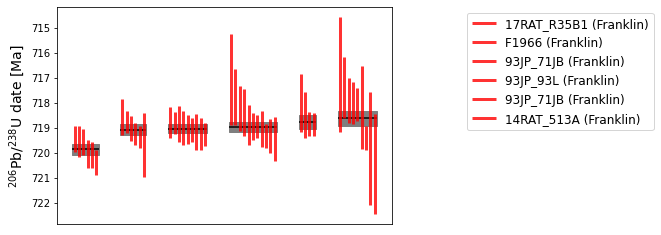

In [35]:
all_dates_dfs = [_17RAT_R35B1,
                 F1966,
                 _93JP_71JB,
                 _93JP_93L,
                 _93JP_93K,
                 _14RAT_513A]

all_dates_dicts = [ _17RAT_R35B1_mean,
                   F1966_mean,
                   _93JP_71JB_mean,
                   _93JP_93L_mean,
                   _93JP_93K_mean,
                   _14RAT_513A_mean]

franklin_zircon_means, franklin_zircon_2sigmas, \
franklin_include = extract_df_lists(all_dates_dfs)
franklin_sample_means, franklin_sample_2sigmas, franklin_colors, \
franklin_labels = extract_dict_lists(all_dates_dicts)

fig, ax = plot_dates(franklin_zircon_means, franklin_zircon_2sigmas, franklin_include,
                    franklin_sample_means, franklin_sample_2sigmas, franklin_colors, franklin_labels)
plt.gca().set_xticks([])

In [36]:
Pu_calculated = pd.DataFrame(all_dates_dicts)
Pu_calculated.sort_values('mean', inplace=True)
Pu_calculated.reset_index(inplace=True, drop=True)
Pu_calculated

,mean,two_sigma,color,label
0,718.614159,0.299921,red,14RAT_513A (Franklin)
1,718.773793,0.296306,red,93JP_71JB (Franklin)
2,718.962765,0.207530,red,93JP_93L (Franklin)
3,719.035950,0.187228,red,93JP_71JB (Franklin)
4,719.085112,0.216255,red,F1966 (Franklin)
5,719.860911,0.214664,red,17RAT_R35B1 (Franklin)


In [37]:
Pu2022_dates_summary = pd.read_csv('../data/geochron/Laurentia/Pu2022_dates.csv')
Pu2022_dates_summary.sort_values('date', inplace=True)
Pu2022_dates_summary.reset_index(inplace=True, drop=True)
Pu2022_dates_summary

,sample,lat,lon,intrusion_type,date,x,y,z,notes
0,14RAT-513A,69.63869,-120.99100,Dyke,718.61,0.30,0.36,0.82,Brock Inlier
1,93JP-93K,68.44681,-111.04878,Sill,718.77,0.30,0.36,0.82,Duke of York Inlier
2,93JP-93L,68.44681,-111.04878,Sill,718.96,0.21,0.29,0.79,Duke of York Inlier
3,93JP-71JB,72.10186,-111.65593,Sill,719.04,0.19,0.28,0.79,Minto Inlier
4,F1966,62.72152,-110.20494,Sill,719.08,0.22,0.30,0.79,Great Slave Lake
5,17RAT-R35B1,67.62236,-115.48222,Sill,719.86,0.21,0.30,0.79,"Coronation Gulf, Coppermine area"


In [38]:
Pu_calculated_main = Pu_calculated[Pu_calculated['mean']<719.5]

In [39]:
Franklin_main_dates = Pu_calculated_main['mean'].to_list()
Franklin_main_2sigma = Pu_calculated_main['two_sigma'].to_list()

resampled_mean_dates = []
resampled_min_dates = []
resampled_max_dates = []
resampled_durations = []
resampled_lags_pre_date = []
resampled_lags_syn_date = []

for n in range(0,100000):
    
    resampled_dates = []

    for n in range(0,len(Franklin_main_dates)):
        date = Franklin_main_dates[n]
        sigma = Franklin_main_2sigma[n]/2
        resampled_date = np.random.normal(date, sigma, 1)
        resampled_dates.append(resampled_date[0])
        
    resampled_mean = np.mean(resampled_dates)
    
    resampled_mean_dates.append(resampled_mean)
    resampled_min_dates.append(min(resampled_dates))
    resampled_max_dates.append(max(resampled_dates))
    resampled_durations.append(max(resampled_dates)-min(resampled_dates))
    
    resampled_Sturt_onset = np.random.normal(717.4, 0.05, 1)
    resampled_lag = min(resampled_dates) - resampled_Sturt_onset
    resampled_lags_pre_date.append(resampled_lag[0])
    
    resampled_Sturt_onset = np.random.normal(716.9, 0.2, 1)
    resampled_lag = min(resampled_dates) - resampled_Sturt_onset
    resampled_lags_syn_date.append(resampled_lag[0])

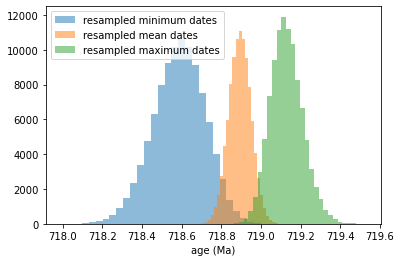

In [40]:
plt.hist(resampled_min_dates, bins=30, histtype='stepfilled', alpha=0.5,
         label='resampled minimum dates')
plt.hist(resampled_mean_dates, bins=30, histtype='stepfilled', alpha=0.5,
         label='resampled mean dates')
plt.hist(resampled_max_dates, bins=30, histtype='stepfilled', alpha=0.5,
         label='resampled maximum dates')
plt.xlabel('age (Ma)')
plt.legend()
plt.show()

The mean duration is:
0.54

with 95% confidence bounds of
0.26 to 0.86


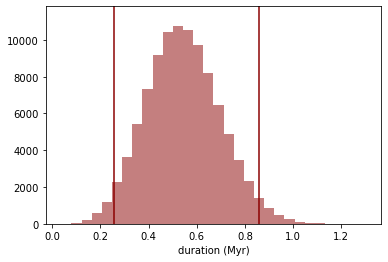

In [41]:
values = plt.hist(resampled_durations, bins=30, histtype='stepfilled', 
                  alpha=0.5, color='darkred')
histmax = np.max(values[0])
ylims = [0,histmax*1.1]

duration_mean = np.mean(resampled_durations)
duration_percentile_2_5 = np.percentile(resampled_durations,2.5)
duration_percentile_97_5 = np.percentile(resampled_durations,97.5)

plt.vlines(x=duration_percentile_2_5,ymin=ylims[0],ymax=ylims[1],
           color='darkred')
plt.vlines(x=duration_percentile_97_5,ymin=ylims[0],ymax=ylims[1],
           color='darkred')
plt.ylim(ylims[0],ylims[1])
plt.xlabel('duration (Myr)')

print('The mean duration is:')
print(round(duration_mean,2))
print('')
print('with 95% confidence bounds of')
print(str(round(duration_percentile_2_5,2)) + ' to ' + str(round(duration_percentile_97_5,2)))

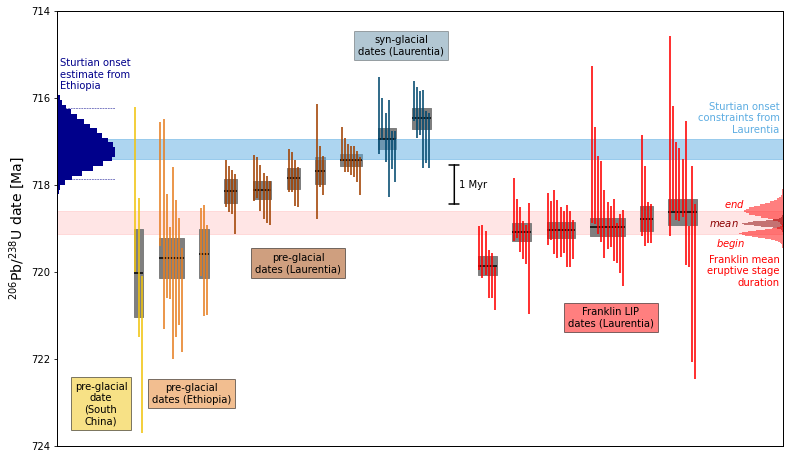

In [42]:
xlim = (-22,210)
ylim = (724,714)

all_dates_dfs = [Lan2020,
                 SAM_ET_04,
                 SAM_ET_03,
                 _15PM06,
                 _15PM08,
                 F837A,
                 F837C,
                 F837B,
                 F917_1,
                 F840A,
                 Bowring2007,
                 _17RAT_R35B1,
                 F1966,
                 _93JP_71JB,
                 _93JP_93L,
                 _93JP_93K,
                 _14RAT_513A]

all_dates_dicts = [Lan2020_mean,
                   SAM_ET_04_mean,
                   SAM_ET_03_mean,
                   _15PM06_mean,
                   _15PM08_mean,
                  F837A_mean,
                  F837C_mean,
                  F837B_mean,
                  F917_1_mean,
                  F840A_mean,
                  Bowring2007_mean,
                  _17RAT_R35B1_mean,
                   F1966_mean,
                   _93JP_71JB_mean,
                   _93JP_93L_mean,
                   _93JP_93K_mean,
                   _14RAT_513A_mean]

zircon_means, zircon_2sigmas, \
include = extract_df_lists(all_dates_dfs)
sample_means, sample_2sigmas, colors, \
labels = extract_dict_lists(all_dates_dicts)

# zircons
fig, ax = plot_dates(zircon_means, zircon_2sigmas, include,\
                     sample_means, sample_2sigmas, colors, labels,\
                     figsize=(13,8), lineweight=2.0, bbox_to_anchor=(1.45,1),legend=False)
ax.set_xlim(xlim)
ax.set_xticks([])

# sturtian start
sturt_lower_bound = F840A_mean['mean']
sturt_upper_bound = F917_1_mean['mean']

rectangle = matplotlib.patches.Rectangle((xlim[0], sturt_upper_bound),\
                                         (xlim[1]-xlim[0]), sturt_upper_bound-sturt_lower_bound, color='#5DADE2', alpha=0.5)
ax.add_patch(rectangle)

# Franklin main stage
franklin_lower_bound = np.median(resampled_min_dates)
franklin_upper_bound = np.median(resampled_max_dates)
franklin_mean = np.median(resampled_mean_dates)

rectangle = matplotlib.patches.Rectangle((xlim[0], franklin_lower_bound),\
                                         (xlim[1]-xlim[0]), franklin_upper_bound-franklin_lower_bound, color='red', alpha=0.1,zorder=-1000)

franklin_lower_bound = np.median(resampled_min_dates)
franklin_upper_bound = np.median(resampled_max_dates)
franklin_mean = np.median(resampled_mean_dates)

rectangle = matplotlib.patches.Rectangle((xlim[0], franklin_lower_bound),\
                                         (xlim[1]-xlim[0]), franklin_upper_bound-franklin_lower_bound, color='red', alpha=0.1,zorder=-1000)

ax.add_patch(rectangle)
#ax.axhline(np.median(resampled_mean_dates), color=Laurentia_pre_glacial_color, lw=0.5)

# MC results
twinax = ax.twiny()
twinax.hist(MC_results, bins=30, histtype='stepfilled', orientation='horizontal', color='darkblue')
ax.axhline(MC_97_5,xmin=0,xmax=.08, color='darkblue', lw=0.5, ls='--')
twinax.axhline(MC_2_5,xmin=0,xmax=.08,color='darkblue', lw=0.5, ls='--')
twinax.set_xlim(0,120000)
twinax.set_xticks([])
twinax.set_ylim(ylim)

twinax2 = ax.twiny()
twinax2.hist(resampled_min_dates, bins=30, histtype='stepfilled',  orientation='horizontal', alpha=0.5,
         label='resampled minimum dates',color='red')
hist_values = twinax2.hist(resampled_mean_dates, bins=30, histtype='stepfilled',  orientation='horizontal', alpha=0.5,
         label='resampled mean dates',color='darkred')
twinax2.hist(resampled_max_dates, bins=30, histtype='stepfilled',  orientation='horizontal', alpha=0.5,
         label='resampled maximum dates',color='red')
twinax2.set_xlim(0,np.max(hist_values[0])*18)
twinax2.invert_xaxis()
twinax2.set_xticks([])
twinax.set_ylim(ylim)

ax.text(-8,723.5,'pre-glacial\ndate\n(South\nChina)',horizontalalignment='center',bbox=dict(facecolor=South_China_color, alpha=0.5))
ax.text(21,723,'pre-glacial\ndates (Ethiopia)',horizontalalignment='center',bbox=dict(facecolor=Ethiopia_color, alpha=0.5))
ax.text(55,720,'pre-glacial\ndates (Laurentia)',horizontalalignment='center',bbox=dict(facecolor=Laurentia_pre_glacial_color, alpha=0.5))
ax.text(88,715,'syn-glacial\ndates (Laurentia)',horizontalalignment='center',bbox=dict(facecolor=Laurentia_syn_glacial_color, alpha=0.3))
#ax.text(120,711.8,'syn-glacial\ndate (Oman)',horizontalalignment='center',bbox=dict(facecolor=Oman_syn_glacial_color, alpha=0.3))
ax.text(155,721.25,'Franklin LIP\ndates (Laurentia)',horizontalalignment='center',bbox=dict(facecolor=Franklin_color, alpha=0.5))
ax.text(xlim[0]+1,715.8,'Sturtian onset\nestimate from\nEthiopia',color='darkblue',horizontalalignment='left')
ax.text(xlim[1]-1,716.8,'Sturtian onset\nconstraints from\nLaurentia',color='#5DADE2',horizontalalignment='right')

ax.text(xlim[1]-12,np.median(resampled_mean_dates)-0.45,'$\it{end}$',color=Franklin_color,horizontalalignment='right',verticalalignment='center')
ax.text(xlim[1]-14,np.median(resampled_mean_dates),'$\it{mean}$',color='darkred',horizontalalignment='right',verticalalignment='center')
ax.text(xlim[1]-12,np.median(resampled_mean_dates)+0.45,'$\it{begin}$',color=Franklin_color,horizontalalignment='right',verticalalignment='center')

ax.text(xlim[1]-1,719.6,'Franklin mean\neruptive stage\nduration',color=Franklin_color,horizontalalignment='right',verticalalignment='top')

line_bottom = franklin_lower_bound - 0.1
ax.annotate("", xy=(105, line_bottom), xycoords='data', xytext=(105, line_bottom-1),arrowprops=dict(arrowstyle="|-|,widthA=0.5, angleA=0, widthB=0.5, angleB=0",linewidth=1.5))
ax.text(106.5,line_bottom-0.5,
        '1 Myr',color='black',horizontalalignment='left',verticalalignment='center')

plt.savefig('./code_output/dates.pdf')
plt.show(fig)

The mean lag to youngest pre-glacial date is:
1.19
with 95% confidence bounds of
0.9 to 1.45

The mean lag to oldest syn-glacial date is:
1.69
with 95% confidence bounds of
1.21 to 2.15

The mean duration is:
0.54
with 95% confidence bounds of
0.26 to 0.86


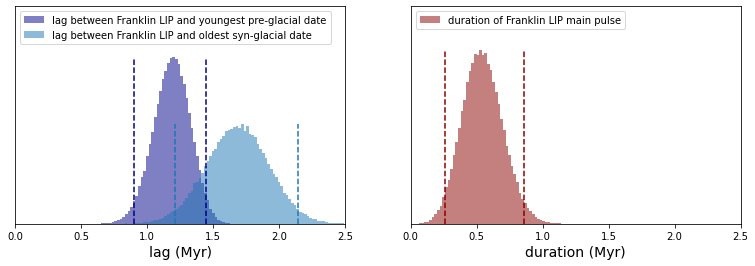

In [43]:
plt.figure(figsize=(13,4))

ax0 = plt.subplot(1,2,1)
values = ax0.hist(resampled_lags_pre_date, bins=np.arange(min(resampled_lags_pre_date), max(resampled_lags_pre_date) + 0.02, 0.02), 
                  histtype='stepfilled', color='darkblue',
                  alpha=0.5,label='lag between Franklin LIP and youngest pre-glacial date')
histmax = np.max(values[0])
ylims = [0,histmax*1.3]

lag_mean = np.mean(resampled_lags_pre_date)
lag_percentile_2_5 = np.percentile(resampled_lags_pre_date,2.5)
lag_percentile_97_5 = np.percentile(resampled_lags_pre_date,97.5)
ax0.vlines(x=lag_percentile_2_5,ymin=ylims[0],ymax=histmax,color='darkblue',linestyles='--')
ax0.vlines(x=lag_percentile_97_5,ymin=ylims[0],ymax=histmax,color='darkblue',linestyles='--')
ax0.set_ylim(ylims[0],ylims[1])
ax0.set_yticks([])
print('The mean lag to youngest pre-glacial date is:')
print(round(lag_mean,2))
print('with 95% confidence bounds of')
print(str(round(lag_percentile_2_5,2)) + ' to ' + str(round(lag_percentile_97_5,2)))

values = ax0.hist(resampled_lags_syn_date, 
                  bins=np.arange(min(resampled_lags_syn_date), max(resampled_lags_syn_date) + 0.02, 0.02),
                  histtype='stepfilled', color='C0',
                  alpha=0.5,label='lag between Franklin LIP and oldest syn-glacial date')
histmax = np.max(values[0])

lag_mean = np.mean(resampled_lags_syn_date)
lag_percentile_2_5 = np.percentile(resampled_lags_syn_date,2.5)
lag_percentile_97_5 = np.percentile(resampled_lags_syn_date,97.5)
ax0.vlines(x=lag_percentile_2_5,ymin=ylims[0],ymax=histmax,color='C0',linestyles='--')
ax0.vlines(x=lag_percentile_97_5,ymin=ylims[0],ymax=histmax,color='C0',linestyles='--')
ax0.set_xlim(0,2.5)
ax0.set_ylim(ylims[0],ylims[1])
ax0.set_xlabel('lag (Myr)', fontsize=14)
ax0.set_yticks([])
print('')
print('The mean lag to oldest syn-glacial date is:')
print(round(lag_mean,2))
print('with 95% confidence bounds of')
print(str(round(lag_percentile_2_5,2)) + ' to ' + str(round(lag_percentile_97_5,2)))

ax0.legend(loc='upper left')


ax1 = plt.subplot(1,2,2)
values = ax1.hist(resampled_durations, 
                  bins=np.arange(min(resampled_durations), max(resampled_durations) + 0.02, 0.02),
                  histtype='stepfilled', alpha=0.5, 
                  color='darkred', label='duration of Franklin LIP main pulse')
histmax = np.max(values[0])
ylims = [0,histmax*1.25]

duration_mean = np.mean(resampled_durations)
duration_percentile_2_5 = np.percentile(resampled_durations,2.5)
duration_percentile_97_5 = np.percentile(resampled_durations,97.5)

ax1.vlines(x=duration_percentile_2_5,ymin=ylims[0],ymax=histmax, color='darkred',linestyles='--')
ax1.vlines(x=duration_percentile_97_5,ymin=ylims[0],ymax=histmax, color='darkred',linestyles='--')
ax1.set_ylim(ylims[0],ylims[1])
ax1.set_xlim(0,2.5)
ax1.set_xlabel('duration (Myr)', fontsize=14)
ax1.set_yticks([])
print('')
print('The mean duration is:')
print(round(duration_mean,2))
print('with 95% confidence bounds of')
print(str(round(duration_percentile_2_5,2)) + ' to ' + str(round(duration_percentile_97_5,2)))

ax1.legend(loc='upper left')

plt.savefig('./code_output/histograms.pdf')
plt.show()


Caption for the figure with both of the previous two figures merged:

High-precision U-Pb geochronological constraints on the onset of the Sturtian glaciation and the timing of Franklin LIP eruptions. The top panel is a date bar plot where the vertical bars are individual zircon 206Pb/238U dates and the horizontal black bars are the weighted mean dates with grey boxes showing their uncertainty. Other than the pre-glacial date from South China published in Lan et al. 2020, all dates were developed by CA-ID-TIMS using the same tracer solution so can be compared to one another at the level of their analytical uncertainties which are shown here. Only dates included in weighted mean calculations are shown — excluding dates that were interpreted to have been inherited or suffered from unmitigated lead-loss. Pre-glacial and syn-glacial dates for Laurentia from Macdonald et al. 2010, Cox et al. 2015, and Macdonald et al. 2017 constrain the onset of glaciation to have been between 717.43 ± 0.14 Ma and 716.94 ± 0.24 Ma which is shown with the light blue box stretching across the plot. Pre-glacial dates from Ethiopia are from MacLennan et al. 2018 and lead to estimated ages for Sturtian onset shown with the dark blue histogram on the left of the plot; these estimates are from extrapolating sedimentation rates from underlying dated horizons with uncertainties quantified through Monte Carlo resampling (95% range shown with dashed lines on either side of the histogram). The Ethiopia data are consistent with a ca. 717 Ma onset of the Snowball Earth (MacLennan et al., 2018). U-Pb zircon dates for the Franklin LIP are all from Pu et al. 2022 with the younger 5 dates being associated with the main pulse. These dates and their uncertainty can be used to estimate a duration of the main stage of Franklin LIP activity. This duration is estimated through resampling from the mean and uncertainty of each weighted mean date, determining the minimum and maximum age of these resamples, and calculating the associated duration. This leads to a duration estimate of 540,000 years (95% range of 260,000 to 860,000 years) which is shown as the light red box extending across the plot. The histogram in the lower right plot shows the duration estimates through this approach with the dashed lines shown the 2.5 and 97.5 percentiles. The histograms on the right of the date bar plot labeled "begin," "mean," and "end" show the resampled start dates, mean dates and end dates of the main pulse, respectively. The time lag between the end of the main pulse of Franklin volcanism and the onset of the Sturtian Snowball Earth as constrained by existing geochronology can be estimated through comparing these Franklin main pulse end dates to the youngest pre-glacial date (resulting in an estimated lag of 1.19 Myr with a 95% range of 0.90 to 1.45 Myr) or the oldest syn-glacial date (resulting in an estimated lag of 1.69 Ma with 95% range of 1.21 to 2.15 Ma). 

(-0.5, 5.5)

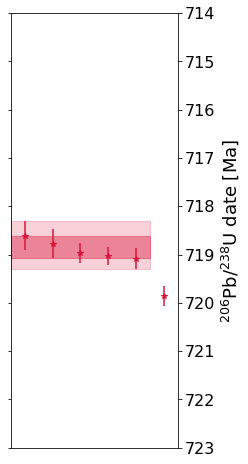

In [44]:
plt.figure(figsize=(3,8))
plt.errorbar(range(0,len(Pu_calculated)),Pu_calculated['mean'].to_list(),
             yerr=Pu_calculated['two_sigma'].to_list(),fmt='*',color='crimson',label='Franklin LIP zircon dates (Pu et al. 2022)')
plt.ylim(723,714)


rectangle = matplotlib.patches.Rectangle((-0.5, 719.08),5, -0.47, color='crimson',alpha=0.4)
plt.gca().add_patch(rectangle)
rectangle = matplotlib.patches.Rectangle((-0.5, 719.3),5, -0.99, color='crimson',alpha=0.2)
plt.gca().add_patch(rectangle)

plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_ticks_position('both')
plt.gca().yaxis.set_label_position("right")
plt.gca().set_ylabel('$^{206}$Pb/$^{238}$U date [Ma]',size=18)
plt.gca().tick_params(axis='both', which='major', labelsize=16)
plt.xticks([])
plt.xlim(-0.5,5.5)

In [45]:
print(F837B_mean)
print(F917_1_mean)

{'mean': 717.4260864753657, 'two_sigma': 0.1377575222401132, 'color': '#A04000', 'label': 'F837B (Laurentia)'}
{'mean': 716.9351361641161, 'two_sigma': 0.23874107078365667, 'color': '#01486e', 'label': 'F917_1 (Laurentia)'}
